In [1]:
import requests

In [2]:
page1 = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents")

In [3]:
from bs4 import BeautifulSoup

In [4]:
soup1 = BeautifulSoup(page1.content, 'html.parser') 

In [5]:
print(soup1.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by continents - Simple English Wikipedia, the free encyclopedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1bbdd62f-f08b-4367-b0d8-57b087f7032a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_continents","wgTitle":"List of countries by continents","wgCurRevisionId":7616818,"wgRevisionId":7616818,"wgArticleId":4810,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from January 2020","All art

In [6]:
continent=soup1.find_all(class_='toctext')   

Continents name extraction

In [7]:
for item in continent:
    print(item.get_text())
      

Africa
Antarctica
Asia
Europe
North America
South America
Oceania
References
Other websites


In [8]:
ol_list=soup1.find_all("ol")

In [9]:
countries=ol_list[0:]


In [10]:
continents=continent[:8]

Collect the name of all the countries per continent from English Wikipedia.

In [11]:
print(continents[0].get_text())
print(countries[0].get_text())
print("\n")

for i in range(1,7):
    if i == 1:
        print(continents[i].get_text())
        print("None")
        print("\n")
        
    else:
        print(continents[i].get_text())
        print(countries[i-1].get_text())
        print("\n")


Africa
Algeria - Algiers
Angola - Luanda
Benin - Porto Novo, Cotonou
Botswana - Gaborone
Burkina Faso - Ouagadougou
Burundi - Gitega
Cameroon (also spelled Cameroun) - Yaoundé
Cape Verde - Praia
Central African Republic - Bangui
Chad (Tchad) - N'Djamena
Comoros - Moroni
Republic of the Congo - Brazzaville
Democratic Republic of the Congo (Zaire) - Kinshasa
Côte d'Ivoire (Ivory Coast) - Yamoussoukro
Djibouti - Djibouti
Equatorial Guinea - Malabo
Egypt (Misr) - Cairo
Eritrea - Asmara
Ethiopia (Abyssinia) - Addis Ababa
Gabon - Libreville
The Gambia - Banjul
Ghana - Accra
Guinea - Conakry
Guinea-Bissau - Bissau
Kenya - Nairobi
Lesotho - Maseru
Liberia - Monrovia
Libya - Tripoli
Madagascar - Antananarivo
Malawi - Lilongwe
Mali - Bamako
Mauritania - Nouakchott
Mauritius - Port Louis
Morocco (Al Maghrib) - Rabat
Mozambique - Maputo
Namibia - Windhoek
Niger - Niamey
Nigeria - Abuja
Rwanda - Kigali
São Tomé and Príncipe - São Tomé
Senegal - Dakar
Seychelles - Victoria
Sierra Leone - Freetown
So

In [12]:
listcontinents=[]
for item in continents:
    listcontinents.append(item.get_text())
    
listcontinents    
    

['Africa',
 'Antarctica',
 'Asia',
 'Europe',
 'North America',
 'South America',
 'Oceania',
 'References']

In [13]:
import pandas as pd

In [14]:
df1=pd.DataFrame(data=listcontinents,columns=['Continents'])
print(df1)

      Continents
0         Africa
1     Antarctica
2           Asia
3         Europe
4  North America
5  South America
6        Oceania
7     References


In [15]:
countriess=countries[:7]

In [16]:
listcountries=[]

for item in countriess:
    listcountries.append(item.get_text())
        

In [17]:
df2=pd.DataFrame(data=listcountries,columns=['Countries'])
print(df2)

                                           Countries
0  Algeria - Algiers\nAngola - Luanda\nBenin - Po...
1  Afghanistan - Kabul\nArmenia - Yerevan\nAzerba...
2  Albania (Shqipëria) - Tirana\nAndorra - Andorr...
3  Canada - Ottawa\nUnited States of America - Wa...
4  Brazil (Brasil) - Brasília\nArgentina - Buenos...
5  Australia - Canberra\nFiji - Suva\nNew Zealand...
6  Australia\nFlores\nLombok\nMelanesia\nNew Cale...


 Dataframe with two columns Country and Continent

In [18]:
dff=pd.concat([df1,df2],axis=1)
dff

,Continents,Countries
0,Africa,Algeria - Algiers\nAngola - Luanda\nBenin - Po...
1,Antarctica,Afghanistan - Kabul\nArmenia - Yerevan\nAzerba...
2,Asia,Albania (Shqipëria) - Tirana\nAndorra - Andorr...
3,Europe,Canada - Ottawa\nUnited States of America - Wa...
4,North America,Brazil (Brasil) - Brasília\nArgentina - Buenos...
5,South America,Australia - Canberra\nFiji - Suva\nNew Zealand...
6,Oceania,Australia\nFlores\nLombok\nMelanesia\nNew Cale...
7,References,NaN


Statistics

In [19]:
import numpy as np
import pandas as pd


In [20]:
page2= requests.get("https://en.wikipedia.org/wiki/World_Happiness_Report#2019_report")
page2

<Response [200]>

In [21]:
soup2 = BeautifulSoup(page2.content, 'html.parser')

In [22]:
tabl=soup2.find("table",{"class":"wikitable"})

In [23]:
dataframe=pd.read_html(str(tabl))[0]
dataframe

,0,1,2,3,4,5,6,7,8
0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
2,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
3,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
4,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
5,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
6,6,Netherlands,7.449,1.339,1.464,0.976,0.614,0.336,0.369
7,7,Sweden,7.353,1.322,1.433,0.986,0.650,0.273,0.442
8,8,New Zealand,7.300,1.242,1.487,1.008,0.647,0.326,0.461
9,9,Austria,7.294,1.317,1.437,1.001,0.603,0.256,0.281


In [24]:
dataframe.columns = dataframe.iloc[0]
dataframe = dataframe[1:]
dataframe

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
2,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
3,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
4,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
5,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
6,6,Netherlands,7.449,1.339,1.464,0.976,0.614,0.336,0.369
7,7,Sweden,7.353,1.322,1.433,0.986,0.650,0.273,0.442
8,8,New Zealand,7.300,1.242,1.487,1.008,0.647,0.326,0.461
9,9,Austria,7.294,1.317,1.437,1.001,0.603,0.256,0.281
10,10,Luxembourg,7.238,1.537,1.388,0.986,0.610,0.196,0.367


Creating a new dataframe with all the information collected and saving to csv

In [25]:
dataframe.to_csv('happinessdataframe.csv')

In [26]:
happiness=pd.read_csv('happinessdataframe.csv')
happiness

,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
5,6,6,Netherlands,7.449,1.339,1.464,0.976,0.614,0.336,0.369
6,7,7,Sweden,7.353,1.322,1.433,0.986,0.650,0.273,0.442
7,8,8,New Zealand,7.300,1.242,1.487,1.008,0.647,0.326,0.461
8,9,9,Austria,7.294,1.317,1.437,1.001,0.603,0.256,0.281
9,10,10,Luxembourg,7.238,1.537,1.388,0.986,0.610,0.196,0.367


Data Visualisation

In [27]:
import matplotlib.pyplot as plt

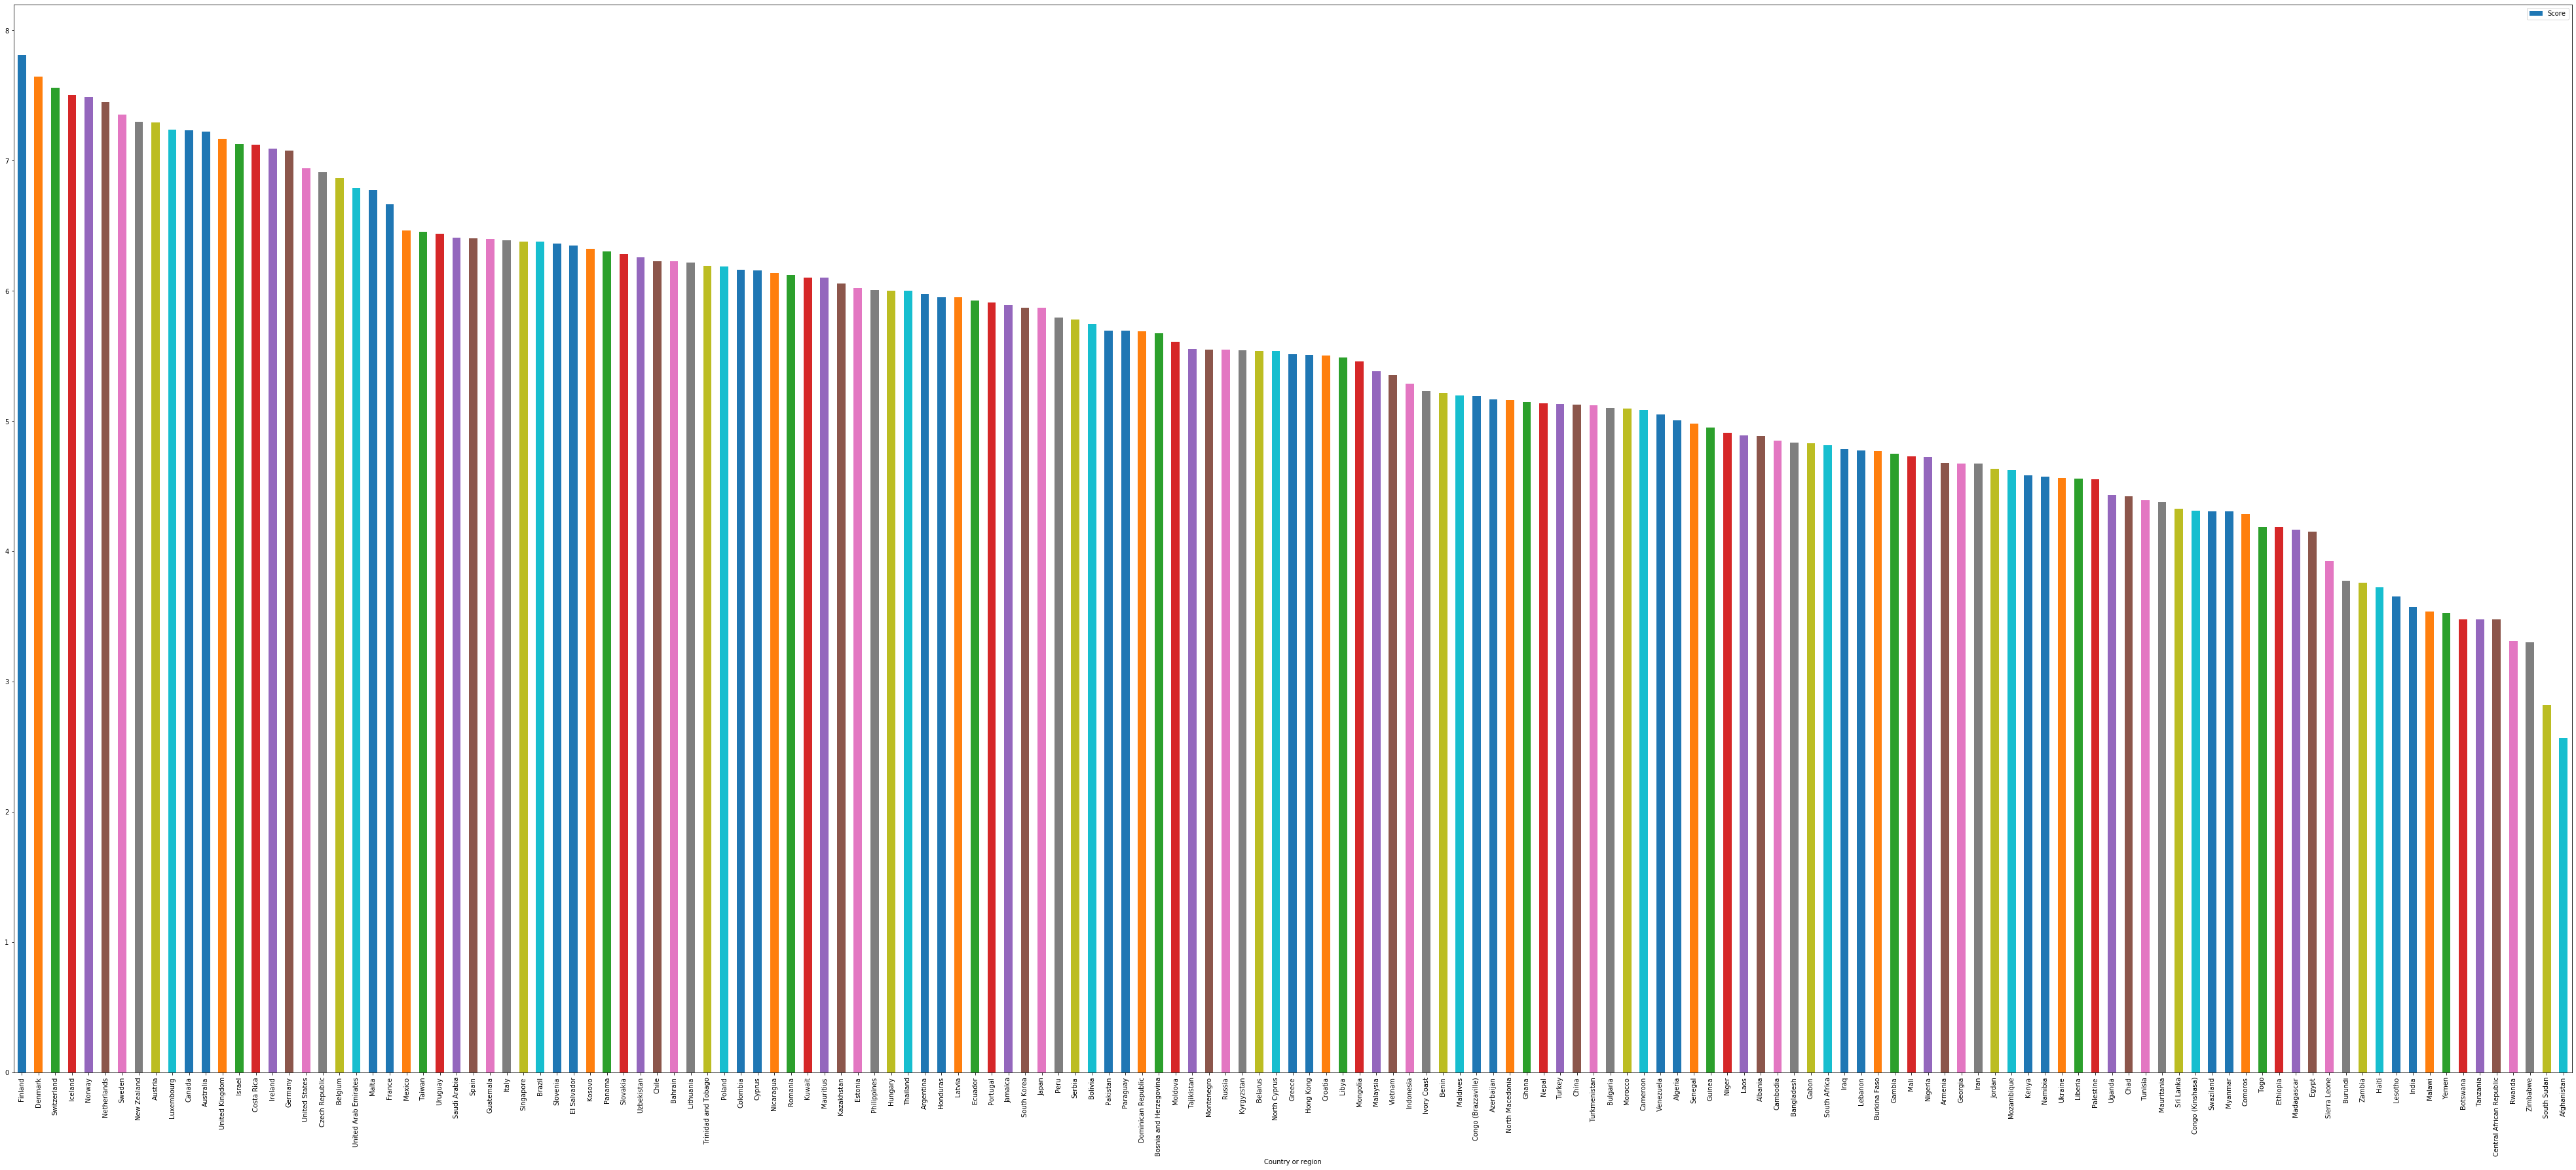

In [28]:
happiness.plot(kind='bar',x='Country or region',y='Score',figsize=(70,30))
plt.show()

In [29]:
happiness.nsmallest(10,'Score')

,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
152,153,153,Afghanistan,2.567,0.301,0.356,0.266,0.000,0.135,0.001
151,152,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111
150,151,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081
149,150,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486
147,148,148,Tanzania,3.476,0.457,0.873,0.443,0.509,0.272,0.204
148,149,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028
146,147,147,Botswana,3.479,0.998,1.086,0.494,0.509,0.033,0.102
145,146,146,Yemen,3.527,0.393,1.177,0.415,0.244,0.095,0.087
144,145,145,Malawi,3.538,0.177,0.530,0.446,0.487,0.213,0.132
143,144,144,India,3.573,0.731,0.644,0.541,0.581,0.237,0.106


In [30]:
happiness["Score"].mean()

5.473254901960784

In [31]:
happiness[happiness["Score"]>=happiness["Score"].median()]

,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
5,6,6,Netherlands,7.449,1.339,1.464,0.976,0.614,0.336,0.369
6,7,7,Sweden,7.353,1.322,1.433,0.986,0.650,0.273,0.442
7,8,8,New Zealand,7.300,1.242,1.487,1.008,0.647,0.326,0.461
8,9,9,Austria,7.294,1.317,1.437,1.001,0.603,0.256,0.281
9,10,10,Luxembourg,7.238,1.537,1.388,0.986,0.610,0.196,0.367
